## **Model 8: Medium CNN (Model 5) with LeakyReLU**

**Preprocessing from model 2**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
SEED = 42

train_dir = "datasets/Training"
test_dir  = "datasets/Testing"

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Validation split
val_size = int(0.2 * len(train_ds))
val_ds = train_ds.take(val_size)
train_ds = train_ds.skip(val_size)

# Normalize
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x,y: (normalization_layer(x), y))
val_ds   = val_ds.map(lambda x,y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x,y: (normalization_layer(x), y))

# Prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)


Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


**With Leaky ReLU**
> Architecture
- Conv2D(32) → LeakyReLU → MaxPool
- Conv2D(64) → LeakyReLU → MaxPool
- Conv2D(128) → LeakyReLU → MaxPool
- Flatten → Dense(128, LeakyReLU) → Dense(4, softmax)

In [8]:
def build_medium_cnn_leakyrelu(input_shape=(128,128,3), num_classes=4):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), padding='same', input_shape=input_shape),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), padding='same'),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), padding='same'),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(128),
        layers.LeakyReLU(alpha=0.1),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model8 = build_medium_cnn_leakyrelu()
model8.summary()

d:\Python11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Python11\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,196 (16.36 MB)

 Trainable params: 4,288,196 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

**Callbacks**

In [9]:
callbacks = [
    EarlyStopping(
        monitor='val_loss', 
        patience=5, 
        min_delta=1e-3, 
        restore_best_weights=True, 
        verbose=1
    ),
          
    ModelCheckpoint(
        filepath='models/model08_best.h5', 
        monitor='val_loss', 
        save_best_only=True, 
        verbose=1
    ),

    ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.5, 
        patience=3, 
        min_lr=1e-6, 
        verbose=1
    )
]


**Compile**

In [10]:
model8.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

**Train**

In [11]:
history8 = model8.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.6011 - loss: 0.9858
Epoch 1: val_loss improved from None to 0.38149, saving model to models/model08_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 33s 217ms/step - accuracy: 0.7193 - loss: 0.7033 - val_accuracy: 0.8652 - val_loss: 0.3815 - learning_rate: 0.0010
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.8587 - loss: 0.3698
Epoch 2: val_loss improved from 0.38149 to 0.28664, saving model to models/model08_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 0.8750 - loss: 0.3328 - val_accuracy: 0.8875 - val_loss: 0.2866 - learning_rate: 0.0010
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.9196 - loss: 0.2294
Epoch 3: val_loss improved from 0.28664 to 0.20117, saving model to models/model08_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 0.9251 - loss: 0.2203 - val_accuracy: 0.9312 - val_loss: 0.2012 - learning_rate: 0.0010
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9565 - loss: 0.1290
Epoch 4: val_loss did not improve from 0.20117
144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 0.9564 - loss: 0.1291 - val_accuracy: 0.9304 - val_loss: 0.2066 - learning_rate: 0.0010
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9724 - loss: 0.0789
Epoch 5: val_loss improved from 0.20117 to 0.18602, saving model to models/model08_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 0.9743 - loss: 0.0749 - val_accuracy: 0.9438 - val_loss: 0.1860 - learning_rate: 0.0010
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9801 - loss: 0.0603
Epoch 6: val_loss did not improve from 0.18602
144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 0.9850 - loss: 0.0513 - val_accuracy: 0.9446 - val_loss: 0.1974 - learning_rate: 0.0010
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9864 - loss: 0.0429
Epoch 7: val_loss did not improve from 0.18602
144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 0.9852 - loss: 0.0437 - val_accuracy: 0.9375 - val_loss: 0.3032 - learning_rate: 0.0010
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.9822 - loss: 0.0498
Epoch 8: val_loss did not improve from 0.18602

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 207ms/step - accuracy: 0.9861 - loss: 0.0388 - val_ac

144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 0.9913 - loss: 0.0224 - val_accuracy: 0.9598 - val_loss: 0.1633 - learning_rate: 5.0000e-04
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9986 - loss: 0.0060
Epoch 10: val_loss did not improve from 0.16326
144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 209ms/step - accuracy: 0.9989 - loss: 0.0043 - val_accuracy: 0.9589 - val_loss: 0.1825 - learning_rate: 5.0000e-04
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9998 - loss: 0.0012
Epoch 11: val_loss did not improve from 0.16326
144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9607 - val_loss: 0.1928 - learning_rate: 5.0000e-04
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 1.0000 - loss: 6.6387e-04
Epoch 12: val_loss did not improve from 0.16326

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 1.0000 

**Load best model**

In [12]:
best_model8 = tf.keras.models.load_model('models/model08_best.h5')

**Evaluate**

In [17]:
# Evaluate on test set
test_loss, test_acc = best_model8.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Get final training & validation metrics
final_train_acc = history8.history['accuracy'][-1]
final_train_loss = history8.history['loss'][-1]
final_val_acc   = history8.history['val_accuracy'][-1]
final_val_loss  = history8.history['val_loss'][-1]

print(f"Final training accuracy: {final_train_acc:.4f}")
print(f"Final training loss: {final_train_loss:.4f}")
print(f"Final validation accuracy: {final_val_acc:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9542 - loss: 0.1816
Test accuracy: 0.9542
Test loss: 0.1816
Final training accuracy: 1.0000
Final training loss: 0.0004
Final validation accuracy: 0.9625
Final validation loss: 0.2051


**Loss curve plotting**

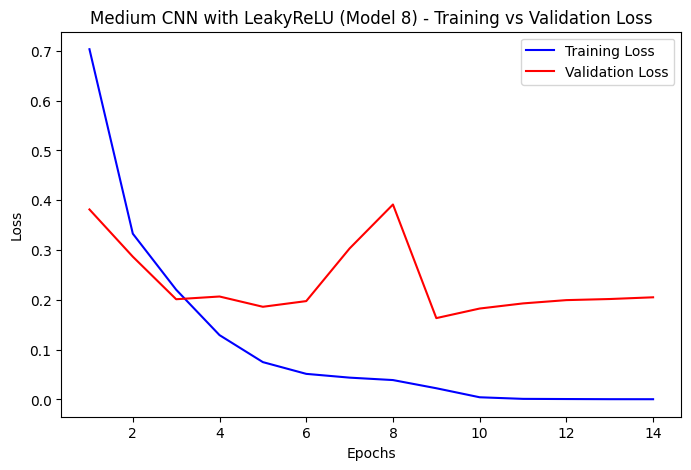

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history, model_name="Model"):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title(f'{model_name} - Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call for Model
plot_loss_curves(history8, model_name="Medium CNN with LeakyReLU (Model 8)")

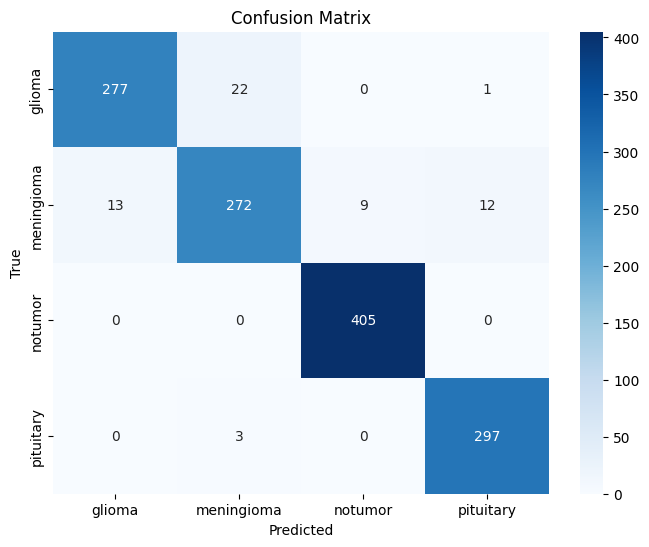


Classification Report:

              precision    recall  f1-score   support

      glioma       0.96      0.92      0.94       300
  meningioma       0.92      0.89      0.90       306
     notumor       0.98      1.00      0.99       405
   pituitary       0.96      0.99      0.97       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



In [2]:
from plot_utils import plot_confusion_matrix_from_dataset

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Confusion matrix from saved model
plot_confusion_matrix_from_dataset("models/model08_best.h5", test_ds, class_names)
